# **How to use a Pre-Trained model 🍧**

## **ToC**

1. How to load a pre-trained model for classification using **Keras**
  - [keras.preprocessing](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing)
  - [keras.applications](https://keras.io/api/applications/)
2. How to load a pre-trained model for classification using **PyTorch**
  - [timm](https://huggingface.co/docs/timm/en/quickstart)
  - [Pillow](https://python-pillow.github.io/)

## **Introduction**

In this laboratory lesson, we will see how to use pre-trained models for image classification. We will analyze this process using the Keras and PyTorch libraries.

We are going to use the VGG16 Neural Network (Visual Geometry Group 16-layer network). This is a deep convolutional neural network (CNN) architecture that was introduced by the Visual Geometry Group at the University of Oxford. It was a top-performing model in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2014.

The **ImageNet** dataset is a large-scale visual database designed for computer vision research. It contains over 14 million labeled images spanning 1,000 object classes, including animals, vehicles, tools, and more. Each image is carefully annotated by humans and vary in dimensions and resolution.

Official website: https://image-net.org/<br>
Some images could be found here: https://github.com/EliSchwartz/imagenet-sample-images/blob/master/gallery.md

VGG16 Neural Network architecture:

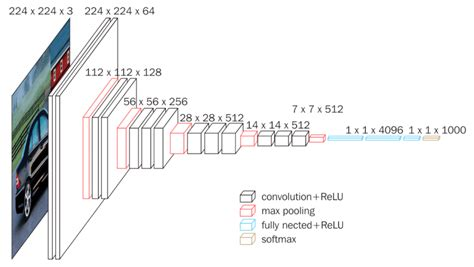

## How to load a pre-trained model for classification using **Keras**

Keras provides a vast set of pre-trained models through the [`keras.applications`](https://keras.io/api/applications/#usage-examples-for-image-classification-models) module.  

This allows us to instantiate ready-to-use models and load pre-trained weights in a very simple and fast way. Each model also comes with a function for input preprocessing (`preprocess_input`) and another to obtain the class name from the model's prediction (`decode_predictions`).

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [ ]:
# TODO: load the VGG16 model pre-trained on ImageNet
model = ...
model.summary()

In [ ]:
# TODO: load the image from disk with the target size of 224x224 as required by VGG16
img = ...
img

In [ ]:
# TODO: convert the image to a numpy array
img_array = ...
display("TO NUMPY ARRAY", img_array)
print()

# TODO: transform unbatched data (img_array) to a badched date (model requires batched data !)
img_array = ...
display("AFTER DIM EXPAND", img_array.shape)
print()

# TODO: perform the pre-processing step
# Preprocess the image to be compatible with VGG16
# This function does the following:
#   - convert the input images from RGB to BGR by swapping the color channels
#   - zero-center each color channel with respect to the ImageNet dataset
#     Zero-centering means subtracting the mean value of each color channel (for R, G, and B channels) from the respective pixel values in the image
img_array = ...
print("AFTER PRE-PROCESSING")
display(img_array)
display(img_array.shape)

In [ ]:
# TODo: make the prediction
predictions = ...

In [ ]:
# TODO: decode the predictions into a readable format. Get top 3 results
decoded_predictions = ...

# Print the top 3 predictions
print("Top 3 predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}. {label}: {score*100:.2f}%")

## How to load a pre-trained model for classification using **Pytorch**

timm (Torch Image Models) is a powerful library for PyTorch that provides a vast collection of pre-trained image models, including state-of-the-art architectures like Vision Transformers (ViTs), EfficientNet, and ConvNeXt. It is designed for flexibility, allowing users to fine-tune models on custom datasets with ease. The library also includes efficient data loaders, augmentations, and various utilities for training deep learning models. With over a thousand model variants optimized for performance and efficiency, timm is widely used in computer vision tasks such as classification, segmentation, and object detection.

timm library documentation: https://huggingface.co/docs/timm/main/en/index<br>
About VGG16 in timm library: https://huggingface.co/timm/vgg16.tv_in1k

In [ ]:
import timm
import torch
from PIL import Image
import pandas as pd

In [ ]:
# TODO: instanciate VGG pre-trained model using timm library
model = ...
model.eval()

In [ ]:
# download the ImageNate unique labels
!wget https://gist.githubusercontent.com/ageitgey/4e1342c10a71981d0b491e1b8227328b/raw/24d78ea09a31fdff540a8494886e0051e3ad68f8/imagenet_classes.txt

In [ ]:
# TODO: load data from csv text to Pandas DataFrame
labels = ...

# TODO: rename columns name to: 'index' and 'name'
...

labels

In [ ]:
# TODO: try to understand a way to get names from index (label) value
...

In [ ]:
# Each model comes with a custom image pre-processing steps. We have to obtain this
# and create a transformation object to pre-process images

# TODO: get pre-processing data_config
data_config = ...

# TODO: create a transformation object fro pre-processing images
transforms = ...

In [ ]:
display(data_config)
display(transforms)

In [ ]:
# TODO: load image from disk using PILLOW
img = ...
display(img)

In [ ]:
# TODO: run the pre-processing steps
x = ...

# TODO: transform single tensor (unbatched) data into a batched one (made by 1 batch)
x = ...
print(x.shape)

In [ ]:
# TODO: run model inference
output = ...

In [ ]:
# Print the top 3 predictions
top5_probabilities, top5_class_indices = torch.topk(output.softmax(dim=1) * 100, k=5)
for p, c in zip(top5_probabilities[0], top5_class_indices[0]):
  print(f"{labels.query('index=='+str(c.item())).name.item()} ({c.item()}): {p.item()}%")